In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import os
import time

In [3]:
data = np.loadtxt("../../data/TracingTheCosmicWeb_PublicData/fof_catalog_200Mpc512.txt", skiprows=3)
N_real = len(data)
data = data[:N_real,[1,2,3]]
idx = np.arange(0,N_real)
x = data[:,0]
y = data[:,1]
z = data[:,2]

In [4]:
df = pd.DataFrame(np.c_[idx, x, y, z], columns=['ID','X','Y','Z'])
np.savetxt('./data/TCW_pos_real.txt',df.values, fmt='%d', header='# id px py pz')

In [5]:
len(idx)

281465

In [6]:
f = open('./data/TCW_pos_real.txt.NDnet_s3.52_manifolds_JE2a.NDnet.a.NDnet')
doc = f.readlines()
N_vertex = int(doc[4])
print(N_vertex)
vertex = doc[5:N_vertex+5]
vertex = np.array([np.array(d.replace('\n','').split(' '), dtype=float) for d in vertex])

44029


In [7]:
x_vertex = vertex[:,0]
y_vertex = vertex[:,1]
z_vertex = vertex[:,2]

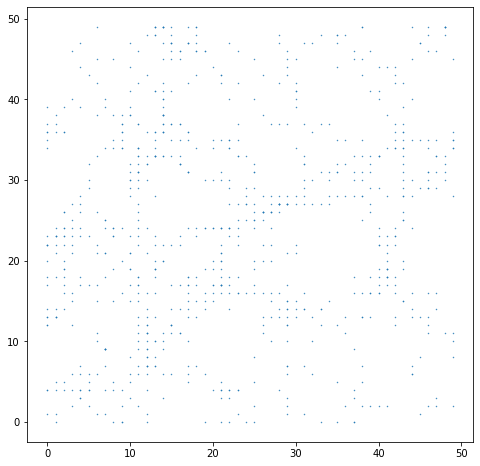

In [9]:
fig = pl.figure(figsize=(8,8))
ii = (z_vertex < 50) & (x_vertex < 50) & (y_vertex < 50)
pl.scatter(x_vertex[ii], y_vertex[ii], s=0.2)

In [10]:
N_cons = int(doc[N_vertex+5:N_vertex+6][0].replace('\n','').split(' ')[-1])
N_cons

46613

In [11]:
cons = doc[N_vertex+6:N_vertex+N_cons+6]
cons = np.array([np.array(d.replace('\n','').split(' '), dtype=int) for d in cons])

In [12]:
x_cons = x[cons]
y_cons = y[cons]
z_cons = z[cons]

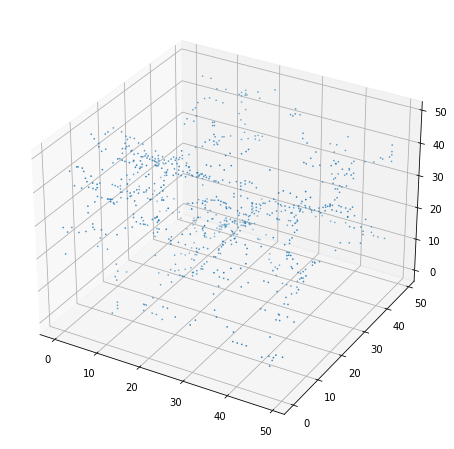

In [15]:
fig = pl.figure(figsize=(8,8))
ax = pl.axes(projection='3d')
ii = (z_vertex < 50) & (x_vertex < 50) & (y_vertex < 50)
ax.scatter3D(x_vertex[ii], y_vertex[ii], z_vertex[ii], s=0.5)

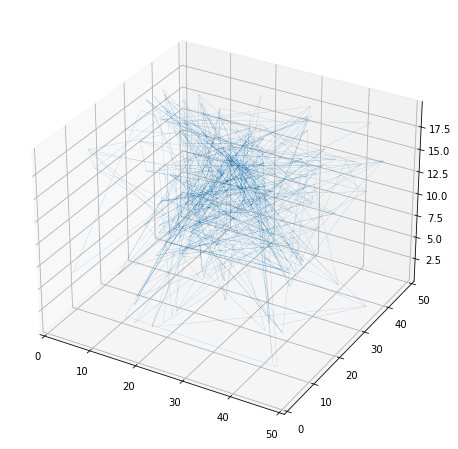

In [17]:
fig = pl.figure(figsize=(8,8))
ax = pl.axes(projection='3d')
ii2 = (z_cons < 20) & (x_cons < 50) & (y_cons < 50)
ax.plot3D(x_cons[ii2], y_cons[ii2], z_cons[ii2], lw=0.1)
pl.xlim(0,50)
pl.ylim(0,50)
pl.show()

In [35]:
f = open('./data/TCW_pos_real.txt.NDnet_s3.52.up.NDskl.S010.a.NDskl')
doc = f.readlines()

In [66]:
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])

In [77]:
FILA = np.zeros(N_fila, dtype=object)

/tmp/ipykernel_83293/1957546861.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "renderized" which is no longer supported as of 3.3 and will become an error in 3.6
  pl.savefig('./figs/TCW_filaments.pdf', bbox_inches='tight', renderized=True)


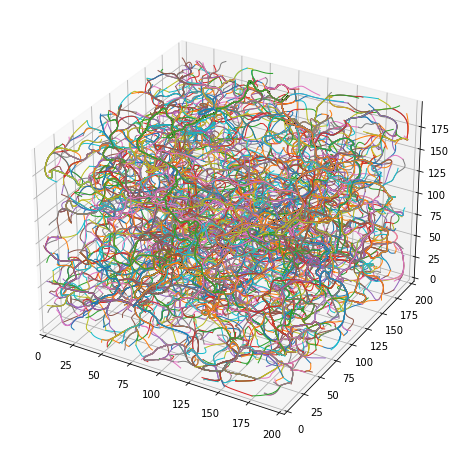

In [131]:
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')

for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    # print(jj,jj_new)
    # print(doc[jj].replace('\n',''),doc[jj_new])
    ax.plot3D(FILA[i][:,0], FILA[i][:,1], FILA[i][:,2], lw=1) 
    jj = jj_new

pl.xlim(0,200)
pl.ylim(0,200)
pl.savefig('./figs/TCW_filaments.pdf', bbox_inches='tight', renderized=True)
pl.show()